<a href="https://colab.research.google.com/github/the-bucketless/bdc/blob/main/bdc_tracking_animation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Animation Example for BDC Tracking Data

This is intended as a quick example of how you can use the [hockey rink](https://github.com/the-bucketless/hockey_rink) package to create animations with the [Big Data Cup tracking data](https://github.com/bigdatacup/Big-Data-Cup-2021/tree/main/TrackingData).  
We'll start by installing the package.

In [1]:
!pip install hockey-rink

  Created wheel for hockey-rink: filename=hockey_rink-0.1.5-py3-none-any.whl size=34687 sha256=f9329ca1c9ec76f35d11261705369ae46f4232df439691171bac4c1b1ca54f55
  Stored in directory: /root/.cache/pip/wheels/f9/c2/97/f77ff47075d5db81869dd64870897c90f13a46d128426398cb
Successfully built hockey-rink


In addition to the rink package, we'll need pandas to grab the csv and matplotlib to do the actual work on the animation.  I recently added a rink specifically for the Big Data Cup, so that's what we'll work with.

In [2]:
from hockey_rink import BDCRink
import pandas as pd

import matplotlib.animation as animation
import matplotlib.pyplot as plt
from matplotlib import rc
rc("animation", html="html5")

We're going to grab the first file I see.  I'm splitting up the string across multiple lines to make it easier to read.  You should keep the dataframe in your own repo or directory, but for this quick example, we'll grab it straight from the repo.

In [3]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/bigdatacup/Big-Data-Cup-2021/main/TrackingData/"
    "2022-02-08%20Canada%20at%20USA/2022-02-08%20Canada%20at%20USA%20P1%20PP1.csv"
)

Because I added the rink to the package, we shouldn't need to update any of its parameters.

In [4]:
rink = BDCRink()

Before we do the animation, we'll do a plot to see what we're going for. I'm setting Canada to red and USA to blue dots. The data allows for coordinates that are outside the rink. For this example, we'll keep them within the bounds of the rink though they could end up outside if they're in the corners.  

Looking over some clips, I've found that shifting the coordinates up and to the left better matches the clip. This might be the reason players end up outside the rink, but we'll adjust for both to be safe.

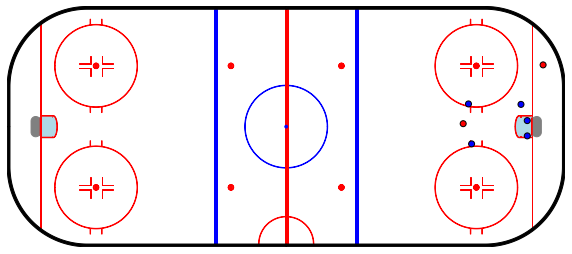

In [5]:
x_shift = -7
y_shift = 4
team_colors = {"Light": "red", "Dark": "blue"}

frame_id = 301
frame_df = df.loc[df.frame_id == frame_id, :]

xs = frame_df.x_ft.clip(lower=0, upper=200) + x_shift
ys = frame_df.y_ft.clip(lower=0, upper=85) + y_shift
color = frame_df.team_id.map(team_colors)

fig = plt.figure(figsize=(10, 8))
rink.draw()
rink.scatter(xs, ys, c=color, edgecolor="black", is_constrained=False, zorder=101);

All right, let's do the animation. You can see this is very similar to the above, just wrapped up in the animation function so it can do multiple frames. We'll only do 10 seconds (30 fps * 10 seconds = 300) so it doesn't take too long to run.

In [6]:
fig = plt.figure(figsize=(10, 8))
fig.set_facecolor("white")
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)

ax = rink.draw()
ax.margins(0, 0)


def update(frame_id):
    ax.clear()

    frame_df = df.loc[df.frame_id == frame_id, :]
    xs = frame_df.x_ft.clip(lower=0, upper=200) + x_shift
    ys = frame_df.y_ft.clip(lower=0, upper=98) + y_shift
    color = frame_df.team_id.map(team_colors)

    rink.draw(ax=ax)
    rink.scatter(xs, ys, c=color, edgecolor="black", is_constrained=False, zorder=101, ax=ax)


anim = animation.FuncAnimation(fig, update, frames=df.frame_id.unique()[:300], interval=33)
plt.close()

Let's see what it looks like.

In [7]:
anim

To show the entire play without spending too much time on the animation, we can also downsample to only take 1 frame per second.

In [8]:
anim_1fps = animation.FuncAnimation(fig, update, frames=df.frame_id.unique()[::30], interval=1000)
plt.close()

In [9]:
anim_1fps